# Regression on Toy Data

### Load Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('./data/sample.csv', header=0, sep=',', encoding='euc-kr')

In [3]:
data = data[['Korean', 'Math']].values

### Split Data: Train data, Test Data

In [4]:
test_idxs = [1, 2, 8, 19]

In [5]:
train_idxs = [idx for idx in range(len(data)) if idx not in test_idxs]

In [6]:
train_data = data[train_idxs]

In [7]:
test_data = data[test_idxs]

### Set Models

#### Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model_lr = LinearRegression(fit_intercept=True) # Loss function is fixed to MSE.

#### DecisionTree

In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
model_dt = DecisionTreeRegressor(#criterion='squared_error', # latest version {“squared_error”, “absolute_error”, ...}
                                 criterion='mse', # v=0.24 {“mse”, “mae”, ...}
                                 splitter='best', # {“best”, “random”}
                                 max_depth=2,
                                 random_state=0)

### Set Loss Function

In [12]:
def mse_loss(pre, y):
    return ((pre-y)**2).mean()

### Split Data: Train data, Validation Data

In [13]:
train_len = 16
train_idxs = np.random.choice(len(train_data), train_len, replace=False)

In [14]:
val_idxs = [idx for idx in range(len(train_data)) if idx not in train_idxs]

In [15]:
val_data = train_data[val_idxs]

In [16]:
train_data = train_data[train_idxs]

### Train and Validate

In [17]:
models = [model_lr, model_dt]

#### Train

In [18]:
x = train_data[:, 0:1]
y = train_data[:, 1]

print(x.shape, y.shape)

(16, 1) (16,)


In [19]:
for model in models:
    model.fit(x, y)
    pre = model.predict(x)
    
    loss_value = mse_loss(pre, y)
    
    print(model, loss_value)

LinearRegression() 0.0
DecisionTreeRegressor(max_depth=2, random_state=0) 11.40625


#### Validate

In [20]:
x = val_data[:, 0:1]
y = val_data[:, 1]

print(x.shape, y.shape)

(4, 1) (4,)


In [21]:
for model in models:
#     model.fit(x, y)
    pre = model.predict(x)
    
    loss_value = mse_loss(pre, y)
    
    print(model, loss_value)

LinearRegression() 0.0
DecisionTreeRegressor(max_depth=2, random_state=0) 2.0625


#### Explain

In [22]:
print("w:", model_lr.coef_, ", b:", model_lr.intercept_)

w: [0.5] , b: 50.0


In [23]:
from sklearn.tree import export_graphviz 
export_graphviz(model_dt, out_file ='tree.txt')
# http://webgraphviz.com/

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
xs = np.arange(0.0, 100.0, 1).reshape(-1, 1)

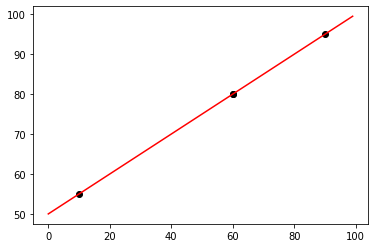

In [26]:
plt.scatter(x, y, c='k')
plt.plot(xs, model_lr.predict(xs), c='r')
plt.show()

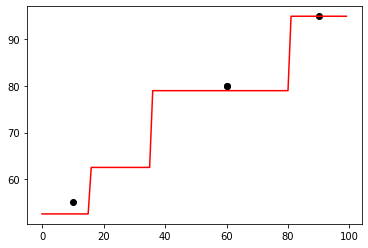

In [27]:
plt.scatter(x, y, c='k')
plt.plot(xs, model_dt.predict(xs), c='r')
plt.show()

### Select Model

In [28]:
model_best = model_lr

### Test Model

In [29]:
x = test_data[:, 0:1]
y = test_data[:, 1]
    
pre = model_best.predict(x)

In [30]:
print("x", x)
print("y", y)
print("pre", pre)

x [[60]
 [ 0]
 [10]
 [90]]
y [80 50 55 95]
pre [80. 50. 55. 95.]


# Regression on Real Data

[Load the California housing dataset (regression)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing)

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people).

An household is a group of people residing within a home. Since the average
number of rooms and bedrooms in this dataset are provided per household, these
columns may take surpinsingly large values for block groups with few households
and many empty houses, such as vacation resorts.

It can be downloaded/loaded using the
:func:`sklearn.datasets.fetch_california_housing` function.

.. topic:: References

    - Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
      Statistics and Probability Letters, 33 (1997) 291-297

In [31]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()

In [32]:
x = california_housing.data
y = california_housing.target
x.shape, y.shape

((20640, 8), (20640,))

### Split Data: Train data, Validation Data

In [33]:
import numpy as np

In [34]:
train_len = 5000
train_idxs = np.random.choice(len(x), train_len, replace=False)
train_x = x[train_idxs]
train_y = y[train_idxs]

In [35]:
val_idxs = [idx for idx in range(len(data)) if idx not in train_idxs]
val_x = x[val_idxs]
val_y = y[val_idxs]

### Set Models

#### Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model_lr = LinearRegression(fit_intercept=True) # Loss function is fixed to MSE.

#### DecisionTree

In [38]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
model_dt = DecisionTreeRegressor(#criterion='squared_error', # latest version {“squared_error”, “absolute_error”, ...}
                                 criterion='mse', # v=0.24 {“mse”, “mae”, ...}
                                 splitter='best', # {“best”, “random”}
                                 max_depth=3,
                                 random_state=0)

### Train and Validate

In [40]:
models = [model_lr, model_dt]

In [41]:
def mse_loss(pre, y):
    return ((pre-y)**2).mean()

#### Train

In [42]:
for model in models:
    model.fit(train_x, train_y)
    pre = model.predict(train_x)
    
    loss_value = mse_loss(pre, train_y)
    
    print(model, loss_value)

LinearRegression() 0.5381251494745094
DecisionTreeRegressor(max_depth=3, random_state=0) 0.6074014242528614


#### Validate

In [43]:
for model in models:
#     model.fit(val_x, val_y)
    pre = model.predict(val_x)
    
    loss_value = mse_loss(pre, val_y)
    
    print(model, loss_value)

LinearRegression() 0.17909990806540965
DecisionTreeRegressor(max_depth=3, random_state=0) 0.28786020403341617


#### Explain

In [44]:
print("w:", model_lr.coef_, ", b:", model_lr.intercept_)

w: [ 4.53732367e-01  1.14000405e-02 -1.44759293e-01  8.37694527e-01
  1.02864714e-05 -4.02835745e-03 -4.00847300e-01 -4.10857708e-01] , b: -34.99388119396719


In [45]:
from sklearn.tree import export_graphviz 
export_graphviz(model_dt, out_file ='tree.txt')
# http://webgraphviz.com/
# or
# https://dreampuf.github.io/GraphvizOnline

### Select Model

In [46]:
model_best = model_lr